In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the normalized DataFrame from a CSV file
df_normalized = pd.read_csv('/content/drive/MyDrive/ravi/df_normalized.csv')  # Replace 'path_to_your_file.csv' with your actual file path


In [ ]:
df_normalized.head()

,runtime_minutes,movie_averagerating,movie_numerofvotes,approval_index,production budget $,domestic gross $,worldwide gross $,profit $,ROI,composite_score,blockbuster
0,-0.319881,0.782505,1.135807,1.144274,-0.183056,0.686305,0.579812,0.136852,0.208099,0.206267,-0.496608
1,0.100756,-0.594386,-1.886908,-1.351697,-0.343144,-3.590112,-3.844042,-0.561833,-0.326703,-0.617200,-0.496608
2,-0.646193,0.880854,1.165469,1.232756,-0.285720,0.366677,0.290083,-0.164540,0.018419,-0.129504,-0.496608
3,-0.481813,-1.577880,-0.234791,-1.099131,1.061386,0.649091,0.341023,-0.602911,-0.268066,-0.626833,-0.496608
4,-0.107596,-0.102640,-1.340304,-0.835569,-0.634034,-2.926408,-2.709018,-0.533952,-0.325453,-0.592762,-0.496608


In [ ]:

from sklearn.model_selection import train_test_split


# Select features and target
X = df_normalized.drop(columns=['profit $', 'ROI'])  # Features (drop the target column)
y = df_normalized['ROI']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (3392, 9)
Test features shape: (849, 9)
Training target shape: (3392,)
Test target shape: (849,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial you want to fit
degree = 1

# Create a polynomial regression model pipeline
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 0.3426935984269072
R-squared (R2) Score: 0.22294323739479172


In [ ]:
print("Predicted ROI:", y_pred)


Predicted ROI: [ 1.34247357e+00  4.81667484e-04  3.61237387e-01  1.29911078e+00
  2.70391516e-01  1.20865976e+00  6.26868622e-02 -5.88040636e-01
 -5.64474149e-01 -5.59562764e-01 -2.11257101e-01 -6.11678389e-01
  1.46458772e+00 -5.30233040e-01 -4.20222101e-01  1.65419918e-01
 -1.07392960e+00  1.10712736e+00  6.64601033e-01 -1.98652636e-01
 -1.66200368e-01 -3.31950896e-01  1.06709740e+00  6.91026716e-01
  1.80771088e-01 -4.20720338e-02  4.68389105e-01  2.84109959e-01
  1.42420008e-01 -4.63475130e-01 -2.91879542e-01  2.68573152e-01
  1.64561826e-01 -1.12031568e-02 -3.17626816e-01 -3.15370141e-01
  1.41639230e-01 -3.67679607e-01 -4.26766216e-01  6.51097801e-01
 -4.24670811e-01  2.65381422e-01 -5.53831588e-01 -1.89160472e-01
 -5.00566494e-01 -5.27687939e-01 -5.85950862e-01  2.43735488e-02
  1.61114206e-01 -4.33057123e-01 -6.41971217e-01  1.23750020e-01
  2.93332657e-01  1.98142943e-01  9.81409023e-01 -2.80940679e-01
 -7.23217322e-01 -4.90515902e-01 -4.42014612e-01  3.22434712e+00
 -9.066151

In [ ]:
print("Actual ROI:", y_test.values)

Actual ROI: [-2.94491491e-01 -1.41494636e-01 -1.41263812e-01  1.76138624e+00
 -2.66134691e-01  2.41620311e-02 -2.67219066e-01 -2.51530459e-01
 -1.97195346e-01 -3.25249754e-01 -1.12038134e-01 -2.81151558e-01
  2.51990620e+00 -3.21860523e-01 -1.81832079e-01 -1.62718829e-01
 -3.13615534e-01  5.99841177e-01  3.51651802e-01 -2.57722128e-01
 -1.87542504e-01 -2.73006094e-01  2.38107943e-02 -2.52181795e-01
 -5.74551455e-02 -1.83431693e-01  7.78475271e-02 -2.64780507e-01
 -3.97961439e-02 -2.55213010e-01 -1.27137048e-01  3.42218043e-03
 -8.58638429e-02 -1.36255415e-01 -2.01681790e-01 -2.11734876e-01
 -1.06152844e-01 -2.43408642e-01 -2.67142921e-01  1.15672902e+00
 -2.66316925e-01 -1.92796612e-02 -2.79470071e-01 -1.62138382e-01
 -2.36925363e-01 -2.38726681e-01 -2.34570061e-01  1.81091050e-01
 -2.46635370e-01 -1.55531108e-01 -2.88711755e-01 -4.34619353e-02
  3.13901411e-01  3.57324269e-02  3.38880610e-01  2.16566004e-02
 -2.46325755e-01 -2.60547602e-01 -2.45715175e-01  1.72380284e-01
 -2.64315800e

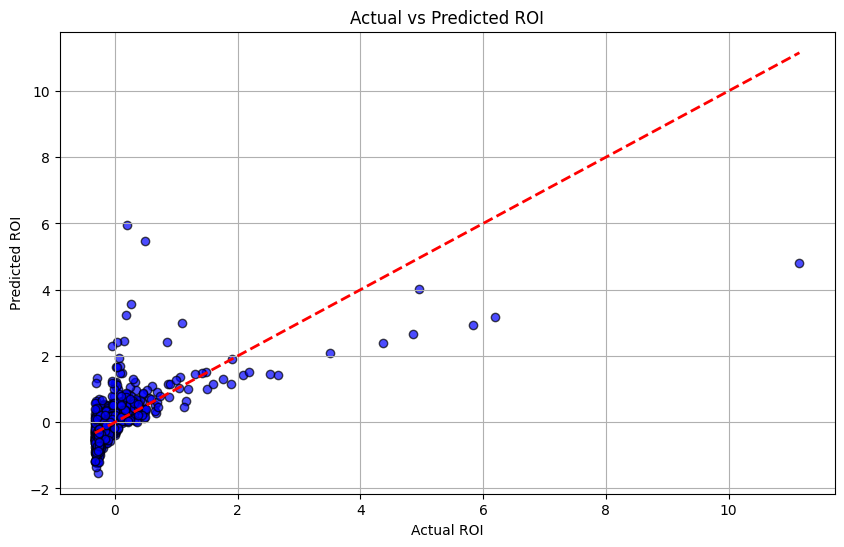

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted ROI values and y_test contains the actual ROI values

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')
plt.title('Actual vs Predicted ROI')
plt.grid(True)
plt.show()


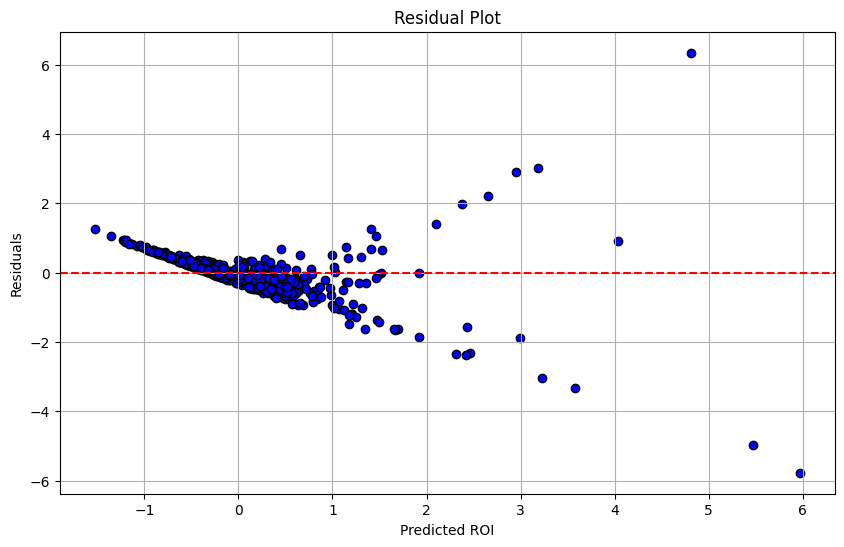

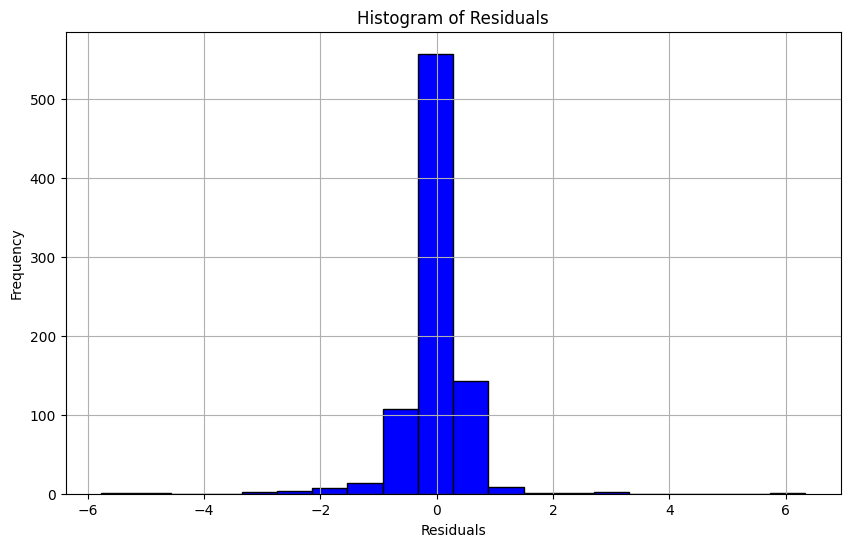

In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted ROI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.3272504230150506
Mean Squared Error (MSE): 0.3426935984269072
Root Mean Squared Error (RMSE): 0.5854003744676862
R-squared (R2) Score: 0.22294323739479172


In [ ]:
# Create a DataFrame with the actual predictions and the corresponding features from X_test
predictions_df = pd.DataFrame({'Predicted ROI': y_pred})

# Concatenate the predictions with the test set features
df_combined = pd.concat([predictions_df.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# Calculate the correlation between Predicted ROI and each feature
correlations = df_combined.corr()['Predicted ROI'].drop('Predicted ROI')  # Dropping the self-correlation

print(correlations)


runtime_minutes        0.063481
movie_averagerating    0.164172
movie_numerofvotes     0.139037
approval_index         0.190493
production budget $   -0.317187
domestic gross $       0.178062
worldwide gross $      0.186163
composite_score        0.782314
blockbuster            0.409074
Name: Predicted ROI, dtype: float64


In [ ]:
# Original predictions
original_predictions = model.predict(X_test)

# Hypothetical scenario: Increase production budget by 20%
X_test_modified = X_test.copy()
X_test_modified['production budget $'] *= 1.2

# Predict ROI under the hypothetical scenario
hypothetical_predictions = model.predict(X_test_modified)

# Compare the original and hypothetical predictions
comparison_df = pd.DataFrame({
    'Original Predicted ROI': original_predictions,
    'Hypothetical Predicted ROI': hypothetical_predictions
})

print(comparison_df)

     Original Predicted ROI  Hypothetical Predicted ROI
0                  1.342474                    1.781365
1                  0.000482                    0.020399
2                  0.361237                    0.578314
3                  1.299111                    1.378521
4                  0.270392                    0.349802
..                      ...                         ...
844                0.224308                    0.369859
845               -0.090805                   -0.185350
846                0.038407                    0.009603
847               -0.600130                   -0.700460
848               -0.326041                   -0.311161

[849 rows x 2 columns]


In [ ]:
sensitivity_results = {}

for feature in X_test.columns:
    X_test_modified = X_test.copy()
    # Increase the feature by 10%
    X_test_modified[feature] *= 1.1
    # Predict ROI
    new_predictions = model.predict(X_test_modified)
    # Calculate the mean change in predictions
    sensitivity_results[feature] = (new_predictions - original_predictions).mean()

sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Mean Change in Predicted ROI'])
print(sensitivity_df)

                     Mean Change in Predicted ROI
runtime_minutes                          0.000085
movie_averagerating                     -0.000792
movie_numerofvotes                       0.001210
approval_index                          -0.000017
production budget $                     -0.001340
domestic gross $                         0.000151
worldwide gross $                        0.000361
composite_score                          0.000299
blockbuster                             -0.000496


In [ ]:
# Define scenarios
scenarios = {
    'Optimistic': {'movie_averagerating': 8.5, 'production budget $': X_test['production budget $'] * 0.9},
    'Pessimistic': {'movie_averagerating': 6.5, 'production budget $': X_test['production budget $'] * 1.2},
    'Most Likely': {'movie_averagerating': X_test['movie_averagerating'].mean(), 'production budget $': X_test['production budget $'].mean()}
}

scenario_results = {}

for scenario, changes in scenarios.items():
    X_test_modified = X_test.copy()
    for feature, value in changes.items():
        X_test_modified[feature] = value
    scenario_results[scenario] = model.predict(X_test_modified).mean()

scenario_df = pd.DataFrame.from_dict(scenario_results, orient='index', columns=['Average Predicted ROI'])
print(scenario_df)


             Average Predicted ROI
Optimistic                1.877581
Pessimistic               1.433737
Most Likely              -0.000937


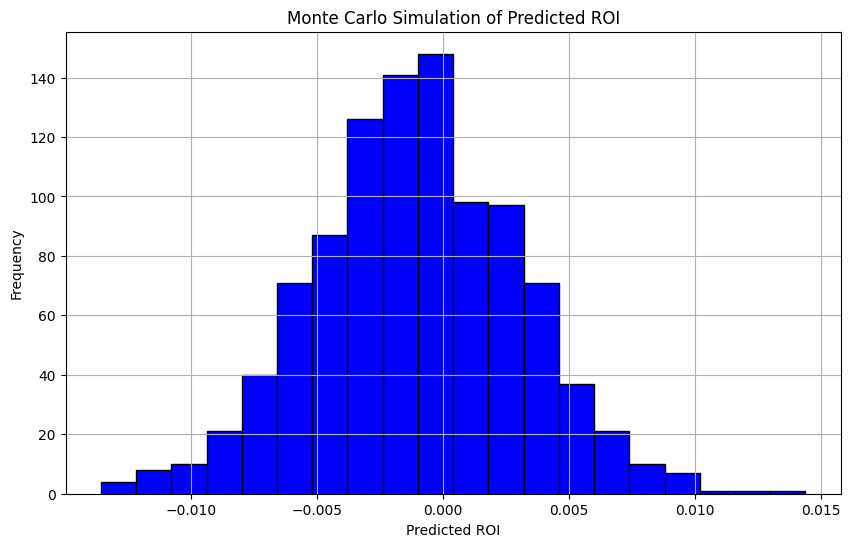

In [ ]:
import numpy as np

num_simulations = 1000
simulations = []

for _ in range(num_simulations):
    X_test_simulation = X_test.copy()
    X_test_simulation['production budget $'] *= np.random.normal(1.0, 0.1, X_test.shape[0])
    X_test_simulation['movie_averagerating'] += np.random.normal(0, 0.5, X_test.shape[0])
    simulation_pred = model.predict(X_test_simulation)
    simulations.append(simulation_pred.mean())

# Plot the distribution of simulation outcomes
plt.figure(figsize=(10, 6))
plt.hist(simulations, bins=20, color='blue', edgecolor='k')
plt.xlabel('Predicted ROI')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Predicted ROI')
plt.grid(True)
plt.show()


Confusion Matrix:
[[  0  29]
 [  0 820]]


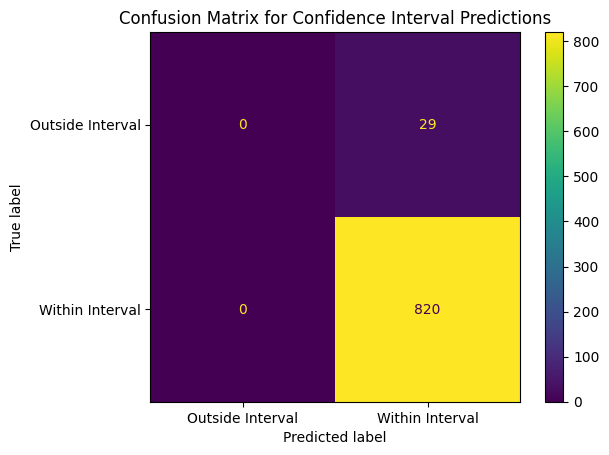

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate residuals
residuals = y_test - y_pred

# Estimate the standard error of the residuals
std_error = np.std(residuals)

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence

# Calculate confidence intervals for each prediction
lower_bound = y_pred - z_score * std_error
upper_bound = y_pred + z_score * std_error

# Check if the actual ROI falls within the confidence interval (True/False)
within_confidence_interval = (y_test >= lower_bound) & (y_test <= upper_bound)

# Convert True/False results to binary (True=1, False=0)
y_true = within_confidence_interval.astype(int)  # Actual values (within interval or not)
y_pred_binary = np.ones_like(y_true)  # Predicted values (assuming model predicts within interval)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Outside Interval", "Within Interval"])
cmd.plot()
plt.title("Confusion Matrix for Confidence Interval Predictions")
plt.show()


PR for movie rating

In [ ]:
import pandas as pd

In [ ]:
# Load the normalized DataFrame from a CSV file
df_normalized = pd.read_csv('/content/drive/MyDrive/ravi/df_normalized.csv')  # Replace 'path_to_your_file.csv' with your actual file path


In [ ]:
df_normalized.head()

,runtime_minutes,movie_averagerating,movie_numerofvotes,approval_index,production budget $,domestic gross $,worldwide gross $,profit $,ROI,composite_score,blockbuster
0,-0.319881,0.782505,1.135807,1.144274,-0.183056,0.686305,0.579812,0.136852,0.208099,0.206267,-0.496608
1,0.100756,-0.594386,-1.886908,-1.351697,-0.343144,-3.590112,-3.844042,-0.561833,-0.326703,-0.617200,-0.496608
2,-0.646193,0.880854,1.165469,1.232756,-0.285720,0.366677,0.290083,-0.164540,0.018419,-0.129504,-0.496608
3,-0.481813,-1.577880,-0.234791,-1.099131,1.061386,0.649091,0.341023,-0.602911,-0.268066,-0.626833,-0.496608
4,-0.107596,-0.102640,-1.340304,-0.835569,-0.634034,-2.926408,-2.709018,-0.533952,-0.325453,-0.592762,-0.496608


In [ ]:

from sklearn.model_selection import train_test_split


# Select features and target
X = df_normalized.drop(columns=["movie_averagerating"])  # Features (drop the target column)
y = df_normalized['movie_averagerating']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (3392, 10)
Test features shape: (849, 10)
Training target shape: (3392,)
Test target shape: (849,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial you want to fit
degree = 1

# Create a polynomial regression model pipeline
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 0.027149590916262765
R-squared (R2) Score: 0.9767590910015597


In [ ]:
print("Predicted movie_averagerating:", y_pred)


Predicted movie_averagerating: [-0.95552488 -0.60427005  2.24796967 -0.29031489 -3.68679044  1.64985102
  0.30634465  1.2550333   0.66389976  0.77610158 -0.94927139 -0.62123297
  0.11990154 -0.58229563  1.17548011 -0.28370953  0.11079743  2.04244283
 -0.65134605  0.20742537  0.78469932 -1.91827457  0.53675212  0.08633304
 -0.8708761  -0.39725668  0.02875032  0.00858364 -0.05326803 -1.58775322
 -0.3095657  -0.35002978 -1.07419004 -1.6402314   0.70425064  0.83772352
 -0.34947375 -1.36960346 -0.88744481  1.26433365 -0.23427387 -1.11397963
 -0.32789555 -0.25121358 -0.34931324  0.16978399 -0.45682396  0.61109612
  0.22339166 -0.92047142 -0.0549726   0.79219227  0.0172423   0.37334445
 -0.31423996  1.25046741  0.99331169  0.7618478  -0.8426672   1.75748258
 -1.66233851  1.16848013  0.4868138  -0.92285111 -1.25502335  0.35900897
 -0.69407795 -0.04083033 -0.04816154  0.05145271 -0.06236475  0.53555763
 -0.15711094 -0.24283613 -0.27109563  0.41908508  0.13170214 -0.7688565
  1.71210672 -4.11019

In [ ]:
print("Actual movie_averagerating:", y_test.values)

Actual movie_averagerating: [-9.87784046e-01 -5.94386498e-01  1.86434818e+00 -2.00988950e-01
 -4.13496443e+00  1.47095063e+00  4.87456759e-01  1.17590247e+00
  6.84155533e-01  1.07755308e+00 -7.91085272e-01 -5.94386498e-01
  1.92408598e-01 -5.94386498e-01  1.17590247e+00 -2.99338337e-01
  1.92408598e-01  1.76599879e+00 -6.92735885e-01  2.90757985e-01
  8.80854307e-01 -2.56137424e+00  6.84155533e-01  2.90757985e-01
 -6.92735885e-01 -3.97687724e-01  9.40592110e-02  9.40592110e-02
 -4.29017604e-03 -1.47953098e+00 -2.00988950e-01 -2.99338337e-01
 -9.87784046e-01 -1.77457914e+00  6.84155533e-01  7.82504920e-01
 -2.00988950e-01 -1.57788037e+00 -8.89434659e-01  1.27425186e+00
 -2.00988950e-01 -1.08613343e+00 -2.99338337e-01 -2.00988950e-01
 -2.99338337e-01  1.92408598e-01 -3.97687724e-01  5.85806146e-01
  2.90757985e-01 -7.91085272e-01 -4.29017604e-03  7.82504920e-01
  9.40592110e-02  3.89107372e-01 -2.99338337e-01  1.17590247e+00
  9.79203694e-01  8.80854307e-01 -8.89434659e-01  1.56930002e+

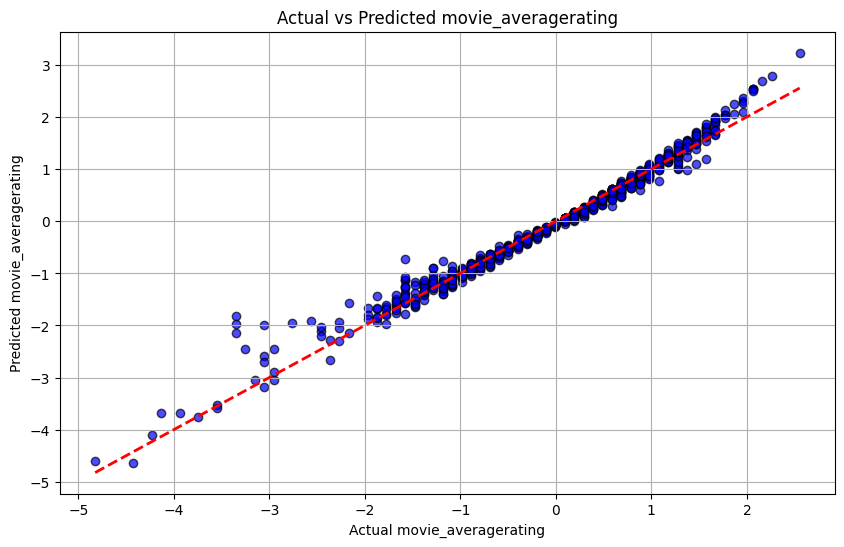

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted movie_averagerating values and y_test contains the actual movie_averagerating values

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual movie_averagerating')
plt.ylabel('Predicted movie_averagerating')
plt.title('Actual vs Predicted movie_averagerating')
plt.grid(True)
plt.show()


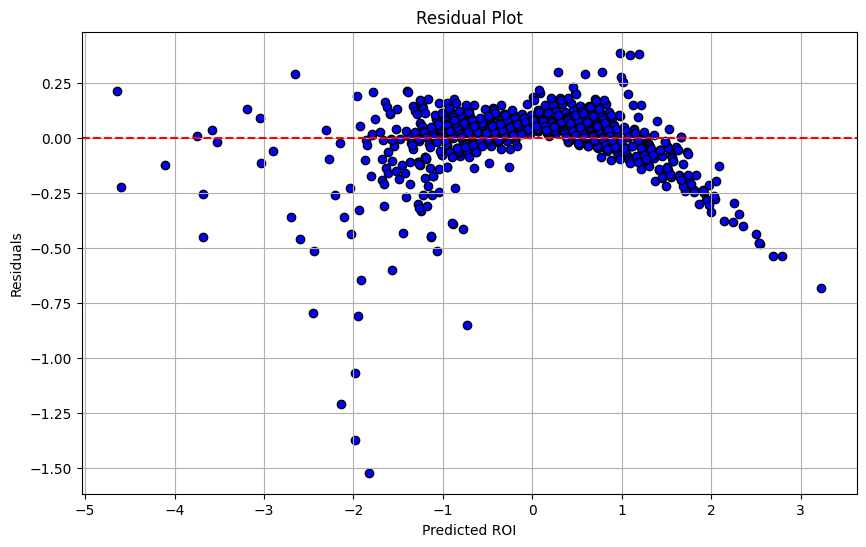

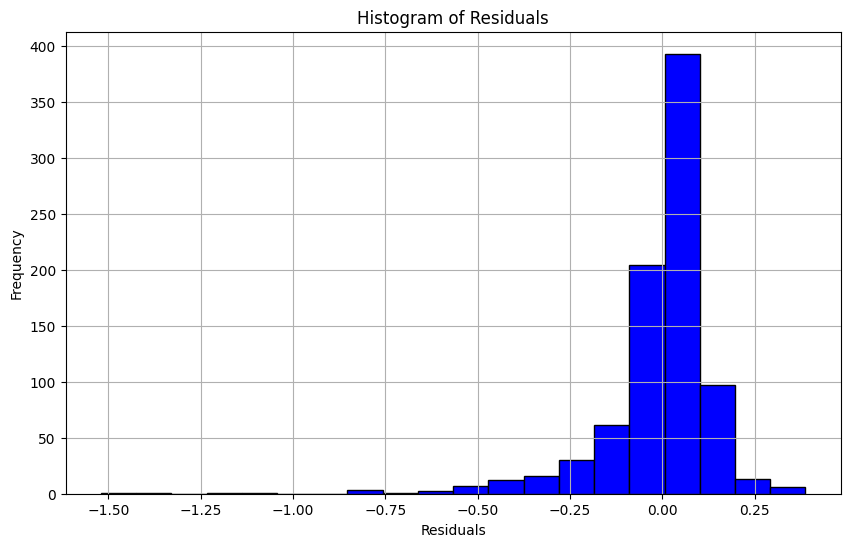

In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted ROI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.09735099418725246
Mean Squared Error (MSE): 0.027149590916262765
Root Mean Squared Error (RMSE): 0.1647713291694364
R-squared (R2) Score: 0.9767590910015597


In [ ]:
# Create a DataFrame with the actual predictions and the corresponding features from X_test
predictions_df = pd.DataFrame({'Predicted movie_averagerating': y_pred})

# Concatenate the predictions with the test set features
df_combined = pd.concat([predictions_df.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# Calculate the correlation between Predicted movie_averagerating and each feature
correlations = df_combined.corr()['Predicted movie_averagerating'].drop('Predicted movie_averagerating')  # Dropping the self-correlation

print(correlations)


runtime_minutes        0.442961
movie_numerofvotes     0.479381
approval_index         0.886998
production budget $    0.003871
domestic gross $       0.194853
worldwide gross $      0.232716
profit $               0.275699
ROI                    0.157429
composite_score        0.293398
blockbuster            0.207846
Name: Predicted movie_averagerating, dtype: float64


In [ ]:
# Original predictions
original_predictions = model.predict(X_test)

# Hypothetical scenario: Increase production budget by 20%
X_test_modified = X_test.copy()
X_test_modified['production budget $'] *= 1.2

# Predict movie_averagerating under the hypothetical scenario
hypothetical_predictions = model.predict(X_test_modified)

# Compare the original and hypothetical predictions
comparison_df = pd.DataFrame({
    'Original Predicted movie_averagerating': original_predictions,
    'Hypothetical Predicted movie_averagerating': hypothetical_predictions
})

print(comparison_df)

     Original Predicted movie_averagerating  \
0                                 -0.955525   
1                                 -0.604270   
2                                  2.247970   
3                                 -0.290315   
4                                 -3.686790   
..                                      ...   
844                                0.073735   
845                               -0.453976   
846                                1.426203   
847                               -1.291499   
848                                0.038597   

     Hypothetical Predicted movie_averagerating  
0                                     -0.952696  
1                                     -0.604142  
2                                      2.249369  
3                                     -0.289803  
4                                     -3.686279  
..                                          ...  
844                                    0.074673  
845                                

In [ ]:
sensitivity_results = {}

for feature in X_test.columns:
    X_test_modified = X_test.copy()
    # Increase the feature by 10%
    X_test_modified[feature] *= 1.1
    # Predict movie_averagerating
    new_predictions = model.predict(X_test_modified)
    # Calculate the mean change in predictions
    sensitivity_results[feature] = (new_predictions - original_predictions).mean()

sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Mean Change in Predicted movie_averagerating'])
print(sensitivity_df)

                     Mean Change in Predicted movie_averagerating
runtime_minutes                                         -0.000031
movie_numerofvotes                                      -0.002966
approval_index                                           0.000048
production budget $                                     -0.000009
domestic gross $                                        -0.000064
worldwide gross $                                        0.000194
profit $                                                -0.000564
ROI                                                      0.000377
composite_score                                          0.000145
blockbuster                                             -0.000034


In [ ]:
# Define scenarios
scenarios = {
    'Optimistic': {'approval_index': 8.5, 'production budget $': X_test['production budget $'] * 0.9},
    'Pessimistic': {'approval_index': 6.5, 'production budget $': X_test['production budget $'] * 1.2},
    'Most Likely': {'approval_index': X_test['approval_index'].mean(), 'production budget $': X_test['production budget $'].mean()}
}

scenario_results = {}

for scenario, changes in scenarios.items():
    X_test_modified = X_test.copy()
    for feature, value in changes.items():
        X_test_modified[feature] = value
    scenario_results[scenario] = model.predict(X_test_modified).mean()

scenario_df = pd.DataFrame.from_dict(scenario_results, orient='index', columns=['Average Predicted movie_averagerating'])
print(scenario_df)


             Average Predicted movie_averagerating
Optimistic                               13.846793
Pessimistic                              10.582166
Most Likely                              -0.027285


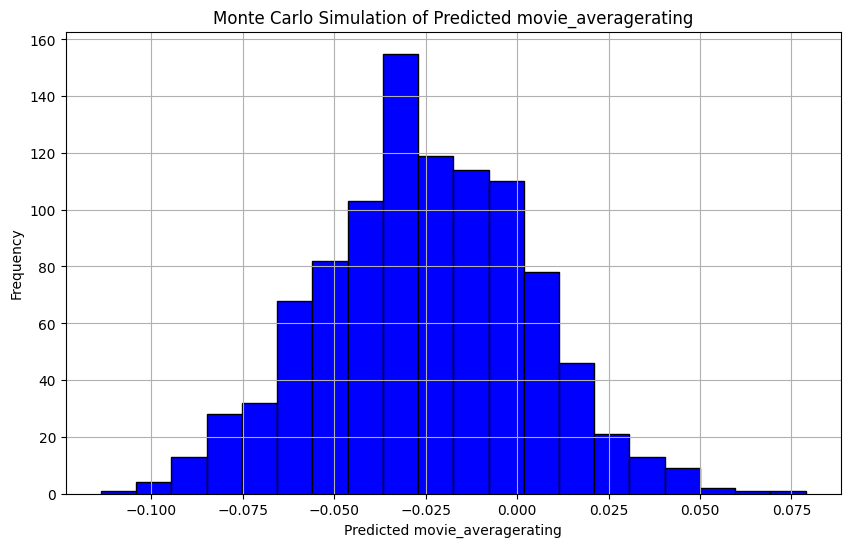

In [ ]:
import numpy as np

num_simulations = 1000
simulations = []

for _ in range(num_simulations):
    X_test_simulation = X_test.copy()
    X_test_simulation['production budget $'] *= np.random.normal(1.0, 0.1, X_test.shape[0])
    X_test_simulation['approval_index'] += np.random.normal(0, 0.5, X_test.shape[0])
    simulation_pred = model.predict(X_test_simulation)
    simulations.append(simulation_pred.mean())

# Plot the distribution of simulation outcomes
plt.figure(figsize=(10, 6))
plt.hist(simulations, bins=20, color='blue', edgecolor='k')
plt.xlabel('Predicted movie_averagerating')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Predicted movie_averagerating')
plt.grid(True)
plt.show()


Confusion Matrix:
[[  0  39]
 [  0 810]]


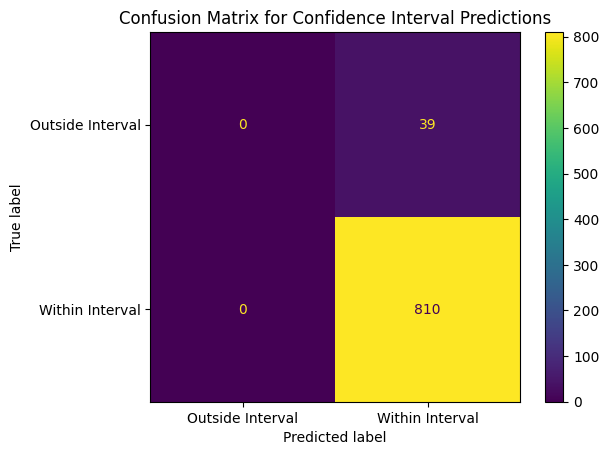

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate residuals
residuals = y_test - y_pred

# Estimate the standard error of the residuals
std_error = np.std(residuals)

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence

# Calculate confidence intervals for each prediction
lower_bound = y_pred - z_score * std_error
upper_bound = y_pred + z_score * std_error

# Check if the actual ROI falls within the confidence interval (True/False)
within_confidence_interval = (y_test >= lower_bound) & (y_test <= upper_bound)

# Convert True/False results to binary (True=1, False=0)
y_true = within_confidence_interval.astype(int)  # Actual values (within interval or not)
y_pred_binary = np.ones_like(y_true)  # Predicted values (assuming model predicts within interval)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Outside Interval", "Within Interval"])
cmd.plot()
plt.title("Confusion Matrix for Confidence Interval Predictions")
plt.show()
